In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import pandas as pd
import xml.etree.ElementTree as ET, urllib.request, gzip, io
from query_catalog_CBPs import find_CBPs
from binary_c_API import evolve_binary

mpl.rc('font',**{'family':'serif','serif':['Palatino']})
mpl.rc('text', usetex=True)
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18
mpl.rcParams['axes.titlesize'] = 16

%matplotlib inline

# Better looking figures
%config InlineBackend.figure_format = 'retina'

# Make cells narrower for better typography
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:65% !important; }</style>"))

# Example trajectories

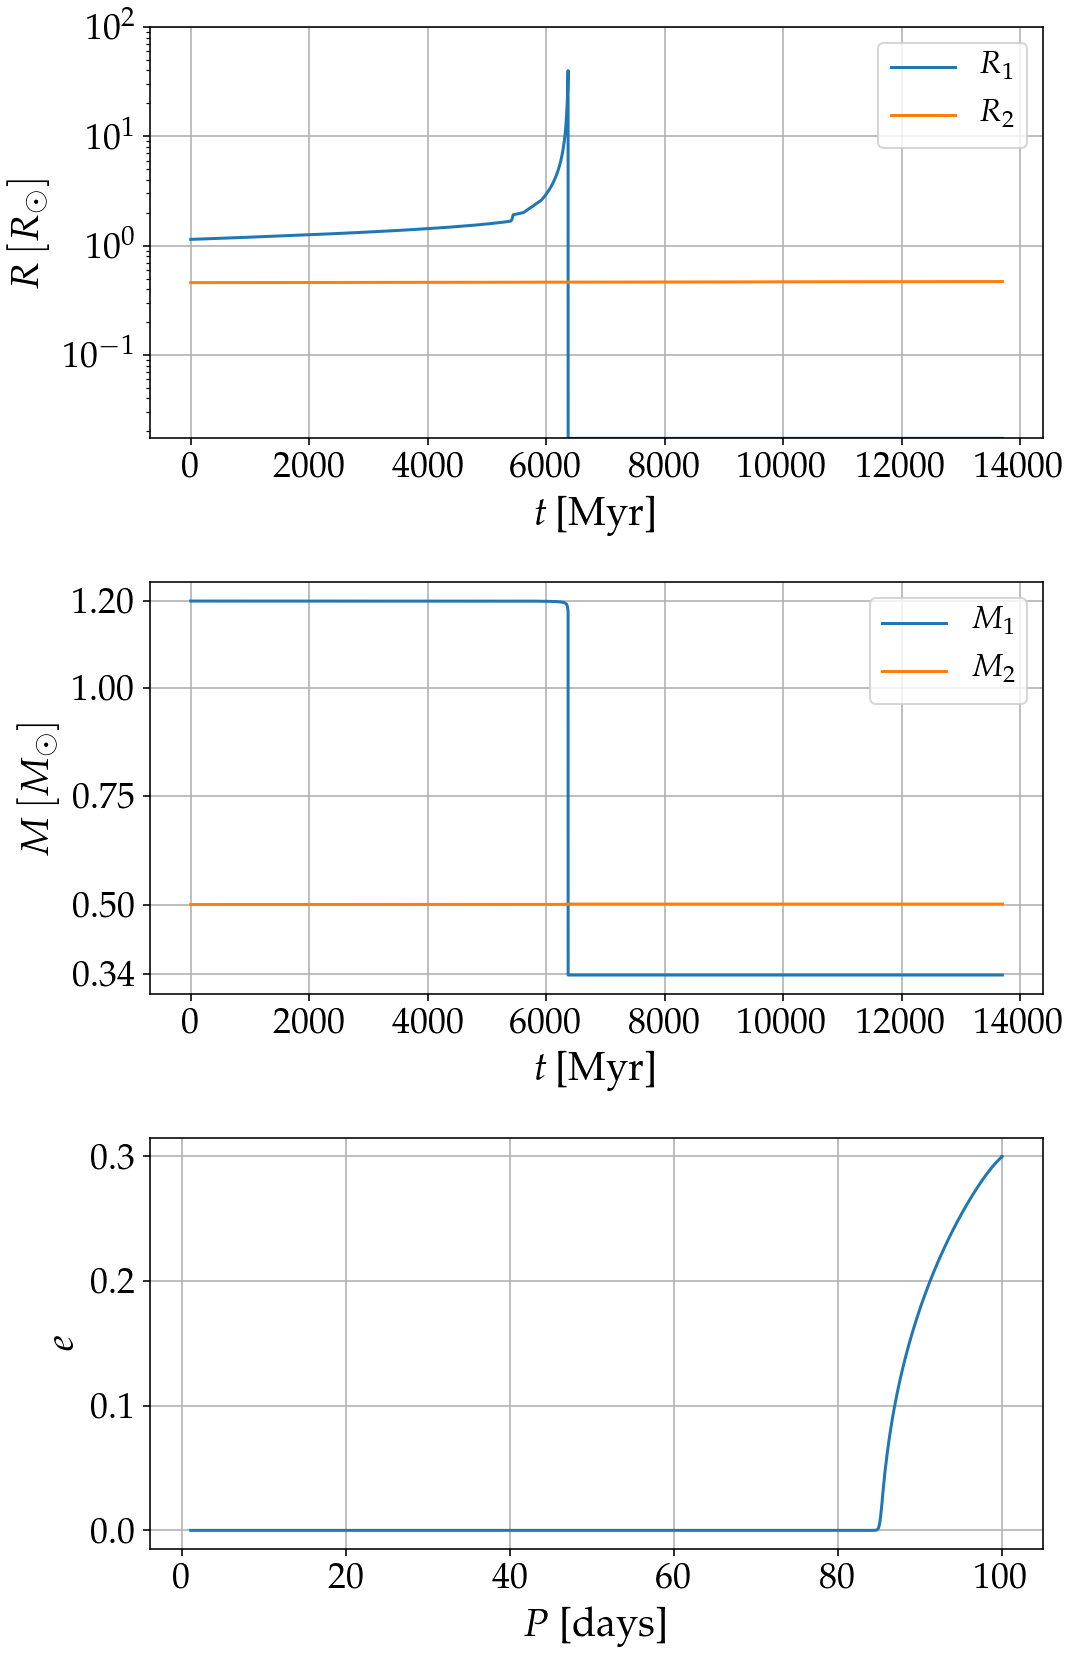

In [5]:
m1 = 1.2
m2 = 0.5
P_bin = 100 # days
e_bin = 0.3
# a_bin = ((m1 + m2)*P_bin**2)**(1/3)

output = evolve_binary(13700, m1, m2, 0.02, P_bin, e_bin)

fig, ax = plt.subplots(3,1, figsize=(8,14))
fig.subplots_adjust(hspace=.35)

ax[0].semilogy(output['t'].values, output['R1'].values, label=r'$R_1$')
ax[0].semilogy(output['t'].values, output['R2'].values, label=r'$R_2$')
ax[0].set_ylim(0, 100)
ax[0].legend(prop={'size': 16})
ax[0].set_xlabel(r'$t\,$[Myr]')
ax[0].set_ylabel(r'$R\,[R_\odot]$')
# ax[0].set_xticks(np.arange(0,15000,3000))
ax[1].plot(output['t'].values, output['M1'].values, label=r'$M_1$')
ax[1].plot(output['t'].values, output['M2'].values, label=r'$M_2$')
ax[1].set_xlabel(r'$t\,$[Myr]')
ax[1].set_ylabel(r'$M\,[M_\odot]$')
ax[1].legend(prop={'size': 16})
ax[1].set_yticks([0.34, 0.5, 0.75,1., 1.2])
ax[2].plot(output['P'].values, output['e'].values)
ax[2].set_xlabel(r'$P$ [days]')
ax[2].set_ylabel(r'$e$')



for a in ax.ravel():
    a.grid(True)
    
# plt.savefig('figures/stellar_evolution/stellar_evo_ex.pdf', bbox_inches='tight')

# Evolution of Kepler CBP hosting stars

In [2]:
def final_configuration(df):
    """
    Iterates through the stellar evolution code output
    and prints important events and final parametars of the system.
    """
    
    final_conf = ["Convective low mass MS","MS","HG",
              "1st GB","CHeB","1st AGB",
              "2nd AGB","MS Naked Helium",
              "HG Naked Helium","GB Naked Helium",
              "Helium WD","C/O WD","O/N WD",
              "NS","BH","Massless"]
    
    print("Final configuration:\n",final_conf[int(df['type1'].iloc[-1])],"+",
          final_conf[int(df['type2'].iloc[-1])])

In [62]:
cbp_transit = find_CBPs('transit')

<class 'xml.etree.ElementTree.ElementTree'>
Total number of CBPs:  29 

2M 1938+4603 b - timing
DP Leo b - timing
FL Lyr b - timing
FW Tau b - imaging
HU Aqr (AB) b - timing
HU Aqr (AB) c - timing
HU Aqr (AB) d - timing
HW Vir (AB) b - timing
Kepler-1647 b - transit
Kepler-16 (AB) b - transit
Kepler-34 (AB) b - transit
Kepler-35 (AB) b - transit
Kepler-38 (AB) b - transit
Kepler-413 b - transit
Kepler-47 (AB) b - transit
Kepler-47 (AB) c - transit
KIC 9632895 b - transit
KOI-2939 b - transit
NN Ser (AB) c - timing
NN Ser (AB) d - timing
NSVS 14256825 c - timing
NSVS 14256825 d - timing
NY Virginis (AB) b - timing
PH-1 A(ab) b - transit
PSR B1620-26 b - timing
Ross 458 C - imaging
ROXs 42 B b - imaging
RR Cae (AB) b - timing
SR 12 C - imaging

Systems with multiple CBPs: 

HU Aqr , 3 planets
Kepler-47 , 2 planets
NN Ser A , 2 planets
NSVS 14256825 A , 2 planets


/home/fran/Drive/Work/master_thesis/notebooks/query_catalog_CBPs.py:79: RuntimeWarning: divide by zero encountered in double_scalars
  mstars[0]/mstars[1],


In [4]:
cbp_transit

,m,m_erru,m_errorl,R,a,P,e,I,mstar1,mstar2,q,a_binary,P_binary,e_binary
Kepler-1647 b,1.520000,0.650000,0.650000,1.060000,2.72050,1107.5923,0.05810,90.0972,1.2100,0.97500,1.241026,0.127600,11.258820,0.16020
Kepler-16 (AB) b,0.333000,NaN,NaN,0.753800,0.70480,228.7760,0.00685,90.0322,0.6897,0.20255,3.405085,0.220000,41.000000,NaN
Kepler-34 (AB) b,0.220000,NaN,NaN,0.764000,1.08960,288.8220,0.18200,90.3550,1.0479,1.02080,1.026548,0.115909,27.795800,0.52087
Kepler-35 (AB) b,0.127000,NaN,NaN,0.728000,0.60347,131.4580,0.04200,90.7600,0.8900,0.81000,1.098765,0.176170,20.733000,0.14210
Kepler-38 (AB) b,NaN,0.000000,0.000000,0.396417,0.46440,105.5950,0.03200,90.1820,0.9490,0.24900,3.811245,0.146000,NaN,0.10320
Kepler-413 b,0.210762,0.069205,0.069205,0.396143,NaN,66.2620,0.11800,4.0730,0.8200,0.54230,1.512078,0.101480,10.116146,0.03720
Kepler-47 (AB) b,NaN,0.000000,0.000000,0.271568,0.29560,49.5140,NaN,89.5900,1.0430,0.36200,2.881215,0.083600,7.448300,0.02340
Kepler-47 (AB) c,NaN,0.000000,0.000000,0.420111,0.98900,303.1580,NaN,89.8260,1.0430,0.36200,2.881215,0.083600,7.448300,0.02340
KIC 9632895 b,0.019503,0.050331,0.050331,0.561818,0.78770,240.5030,0.03790,89.4338,0.9340,0.19380,4.819401,0.184790,27.322037,0.05100
KOI-2939 b,1.520000,0.648000,0.648000,1.059320,2.72050,1107.5923,0.05810,90.0972,1.2207,0.96780,1.261314,0.127600,11.258818,0.16020


In [63]:
def evolve_kepler_stars():
    
    stars = ['Kepler-34 (AB) b','Kepler-35 (AB) b', 'Kepler-413 b','Kepler-47 (AB) b',
            'KIC 9632895 b','KOI-2939 b','PH-1 A(ab) b']

    for i, s in enumerate(stars):
        output = evolve_binary(13700, cbp_transit.loc[stars[i],'mstar1']
                           , cbp_transit.loc[stars[i],'mstar2'], 0.02,
                           cbp_transit.loc[stars[i],'P_binary'],
                           cbp_transit.loc[stars[i],'e_binary'])
        print(s, ":")
        print("P = ", cbp_transit.loc[stars[i],'P_binary'],
             "M1 = ", cbp_transit.loc[stars[i],'mstar1'],
             "M2 = ", cbp_transit.loc[stars[i],'mstar2'])

        # Ignore post CE evolution (e < 0)
#         mask = output['e'] >= 0
        
#         fig, ax = plt.subplots(4,1, figsize=(10,20))
#         # fig.subplots_adjust(hspace=.35)
#         for a in ax.ravel():
#             a.grid(True)
#         #     a.set_xlim(3600,3880)

#         ax[0].plot(output['t'].loc[mask], output['M1'].loc[mask])
#         ax[0].plot(output['t'].loc[mask], output['M2'].loc[mask])
#         ax[0].set_ylabel(r'mass [msun]')
#         ax[1].plot(output['t'].loc[mask], output['R1'].loc[mask])
#         ax[1].plot(output['t'].loc[mask], output['R2'].loc[mask])
#         ax[1].set_ylabel(r'radius [rsun]')
#         ax[2].plot(output['t'].loc[mask], output['P'].loc[mask])
#         ax[2].set_ylabel(r'period [day]')
#         ax[3].plot(output['t'].loc[mask], output['e'].loc[mask])
#         ax[3].set_ylabel(r'eccentricity')
#         ax[3].set_xlabel('time [Myr]')

#         plt.savefig(s+'.pdf')

evolve_kepler_stars()

Kepler-34 (AB) b :
P =  27.7958 M1 =  1.0479 M2 =  1.0208


NameError: name 'final_configuration' is not defined

# Evolution in the period-eccentricity space

/home/fran/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_base.py:3193: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=-0.0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))


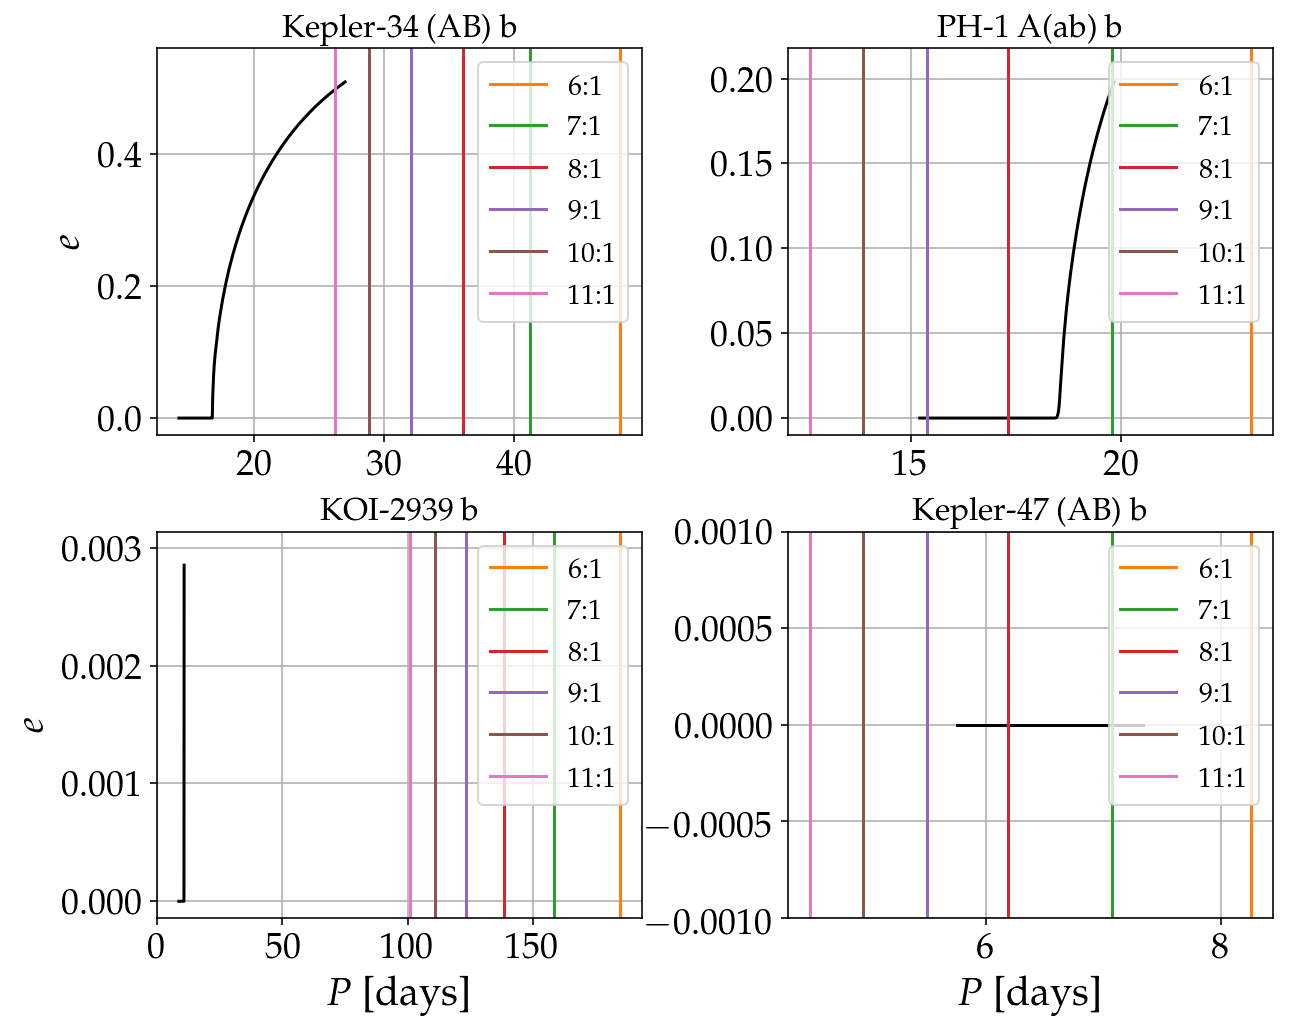

In [93]:
def plot_resonance_crossings(ax, system):    
    output = evolve_binary(13700, cbp_transit.loc[system,'mstar1'],
                           cbp_transit.loc[system,'mstar1'], 0.02,
                       cbp_transit.loc[system,'P_binary'],
                       cbp_transit.loc[system,'e_binary'])

    # Select only period of significant evolution when e,a is defined    
    GB = output['type1'].values == 3
    e_positive = output['e'].values >= 0

    mask = GB*e_positive

    if (np.any(mask) == True):  
        P_planet = cbp_transit.loc[system,'P']
        ax.plot(output['P'].iloc[mask].values, 
                output['e'].iloc[mask].values, color='black')
        ax.axvline(x=P_planet/6., label='6:1',color='C1')
        ax.axvline(x=P_planet/7., label='7:1', color='C2')
        ax.axvline(x=P_planet/8., label='8:1', color='C3')
        ax.axvline(x=P_planet/9., label='9:1', color='C4')
        ax.axvline(x=P_planet/10., label='10:1', color='C5')
        ax.axvline(x=P_planet/11., label='11:1', color='C6')


        ax.set_title(system)
        ax.legend(loc='upper right', prop={'size':14})
        ax.set_ylim(-0.05*np.max(output['e'].iloc[mask].values),
                    1.1*np.max(output['e'].iloc[mask].values))
        
            
systems = ['Kepler-34 (AB) b','Kepler-47 (AB) b','KOI-2939 b','PH-1 A(ab) b']
fig, ax = plt.subplots(2,2, figsize=(10, 8))
fig.subplots_adjust(wspace=0.3, hspace=0.25)
    
plot_resonance_crossings(ax[0, 0], systems[0])
plot_resonance_crossings(ax[0, 1], systems[3])
plot_resonance_crossings(ax[1, 0], systems[2])
plot_resonance_crossings(ax[1, 1], systems[1])

for a in ax.ravel():
    a.grid(True)
for a in ax[1, :]:
    a.set_xlabel(r'$P$ [days]')
for a in ax[:, 0]:
    a.set_ylabel(r'$e$')
# plt.savefig('figures/stellar_evolution/stellar_evo_kepler.pdf', bbox_inches='tight')

We see from the above plot that resonances of the planet with the binary most likely
don't matter much for Kepler circumbinary planets. Most of the planets are outside the 6:1 
and 7:1 resonances, and during RGB, a planet will cross at most two resonances before RLOF
starts.

# The evolution of resonance widths

/home/fran/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in true_divide
/home/fran/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in true_divide
/home/fran/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: RuntimeWarning: invalid value encountered in multiply
/home/fran/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


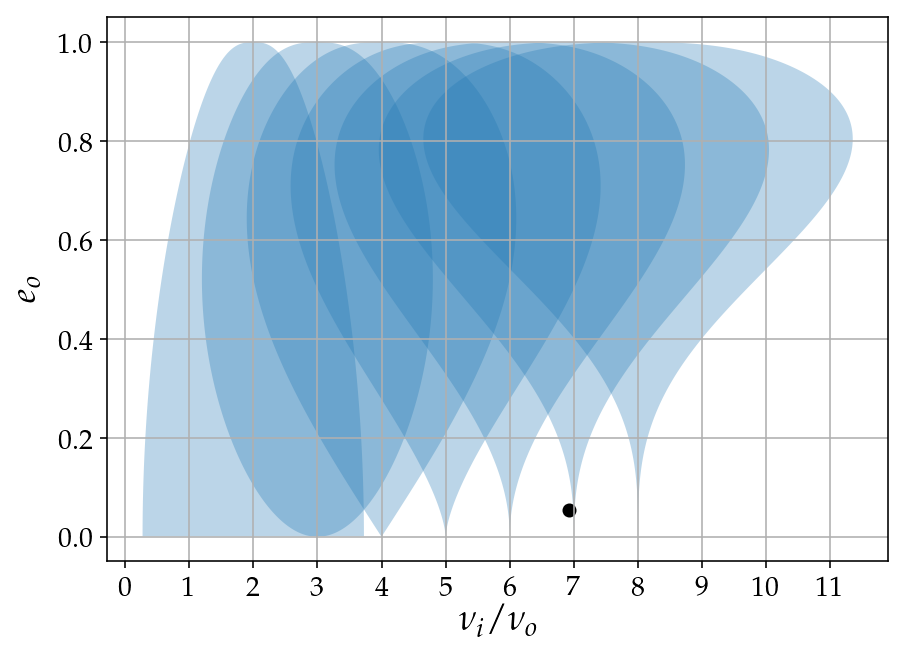

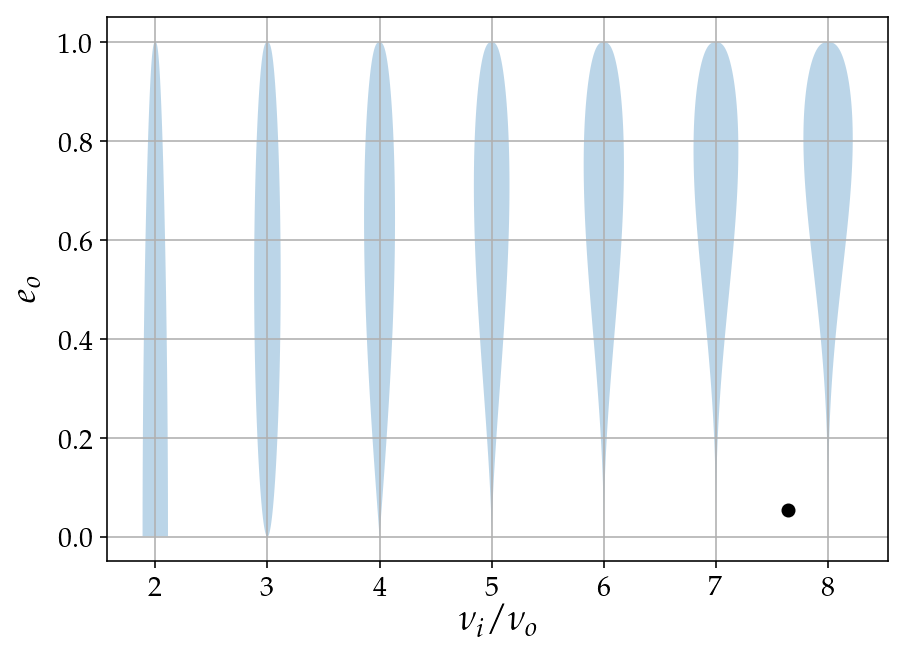

In [8]:
def plot_resonances(ax, m1, m2, m3, e_i, e, P_i, P_o):
    def resonance_width(m1, m2, m3, n, e_i, e_o):
        m123 = m1 + m2 + m3
        m12 = m1 + m2
        xi = np.arccosh(1/e_o) - np.sqrt(1 - e_o**2)
        tmp = (6*0.71**.5/((2*np.pi)**(1/4.)))*\
                (m3/m123 + n**(2/3.) *(m12/m123)**(2/3.)*(m1*m2/m12**2))**.5 *\
                (e_i**.5/e_o)*(1 - 13/24.*e_i**2.)**.5*(1 - e_o**2)**(3/8.)*\
                n**(3/4.)*np.exp(-n*xi/2.);
        return tmp
    
    e_o = np.linspace(0, 1, 1000) 
    
    for n in range(2, 9):
        width = resonance_width(m1, m2, m3, n, e_i, e_o)
        ax.fill_betweenx(e_o, -width + n, width + n, facecolor='C0', alpha=0.3)
        
    ax.grid(True)
#     ax.set_xlim(0, 12)
    ax.set_xlabel(r'$\nu_i/\nu_o$')
    ax.set_ylabel(r'$e_o$')
    ax.set_xticks(np.arange(0, 13))   
    ax.scatter(P_o/P_i, e, color='black')
    ax.legend()

    
system = 'PH-1 A(ab) b'   
output = evolve_binary(13700, cbp_transit.loc[system,'mstar1'],
                       cbp_transit.loc[system,'mstar2'], 0.02,
                           cbp_transit.loc[system,'P_binary'],
                           cbp_transit.loc[system,'e_binary'])


fig, ax = plt.subplots(figsize=(7,5))

plot_resonances(ax, 
                output['M1'].iloc[0], 
                output['M2'].iloc[0], 
                1e-04,
                output['e'].iloc[0], 
                cbp_transit.loc[system,'e'], 
                output['P'].iloc[0], 
                cbp_transit.loc[system,'P'])

GB = output['type1'].values == 3

m1 = output['M1'].iloc[GB]
m2 = output['M2'].iloc[GB]
e = output['e'].iloc[GB]
P = output['P'].iloc[GB]

fig, ax2 = plt.subplots(figsize=(7,5))

plot_resonances(ax2, 
                m1.iloc[-1600], 
                m2.iloc[-1600], 
                1e-04,
                e.iloc[-1600], 
                cbp_transit.loc[system,'e'], 
                P.iloc[-1600], 
                cbp_transit.loc[system,'P'])

In [ ]:
output = evolve_binary(13700, 1.2, 0.5, 0.02,
                           15,
                           0.3)
output['type1']
# output['a'].iloc[6300:].plot()